# ICOS Labelling plots
Generates plots for use in ICOS Labelling reports.

## Initial Setup
Instructions for setting up in a virtual environment (venv). To be run from the folder containing the notebooks.

1. `python -m venv .venv`
2. `source .venv/bin/activate`
3. `pip install pandas matplotlib jupyter ipykernel`
4. `python -m ipykernel install --user --name=.venv`
5. `jupyter notebook`

Open this notebook and make sure it is running using the `.venv` kernel.


## Subsequent Usage
The initial setup above only needs performing once. After that, you need only run:

1. `source .venv/bin/activate`
2. `jupyter notebook`

## Files
The notebook expects two folders: `input` and `output`.

The `input` folder should contain a subfolder for a station, and within that the uncompressed data from a QuinCe export containing at least the "ICOS OTC Labelling" format file.

The `output` folder can be empty; the notebook will take care of creating the necessary folder structure inside it.

## Notebook Initialisation
The cell below will initialise the notebook ready for use

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.dates as mdates
import os

## Data Setup
Fill in the variables below to match the details of the data to be processed.

| Variable            | Meaning       |
| ------------------- | ------------- |
| `station_name`      | The name of the station. There should be a folder with the same name in the `input` folder. |
| `dataset`           | The name of the dataset exported from QuinCe. This should be the name of the unzipped export from QuinCe within the folder named after the station name. |
| `water_flow_column` | The name of the column containing the water flow. |


In [2]:
station_name = 'Celtic Explorer'
dataset = '45CE20240503'
water_flow_column = 'H2O flow'

## General Setup

In [3]:
# Create output folder
output_folder = f'output/{station_name}/{dataset}'
os.makedirs(output_folder, exist_ok=True)

## Load data and set up
Load the data file and perform required pre-preprocessing.

If there is known invalid data in the dataframe, it must be removed here.

In [4]:
datapath=f'input/{station_name}/{dataset}/dataset/ICOS OTC Labelling/{dataset}.csv'
df=pd.read_csv(datapath)

# Remove invalid data

df = df[df[water_flow_column] < 100]

# Reset dataset indices
df = df.reindex()

# Extract timestamps
dt=pd.to_datetime(df['Date/Time'])

# Default x axis (time)
x = dt

/tmp/ipykernel_673022/3566074888.py:2: DtypeWarning: Columns (3,7,15,23,27,31,35,39,47,50,55,58,61,64,67,73,76,79,82,85) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(datapath)


## Water Flow

Set `water_flow_column` to the correct column name.

Set `min_water_flow` to set the threshold for highlighting low/no water flow.

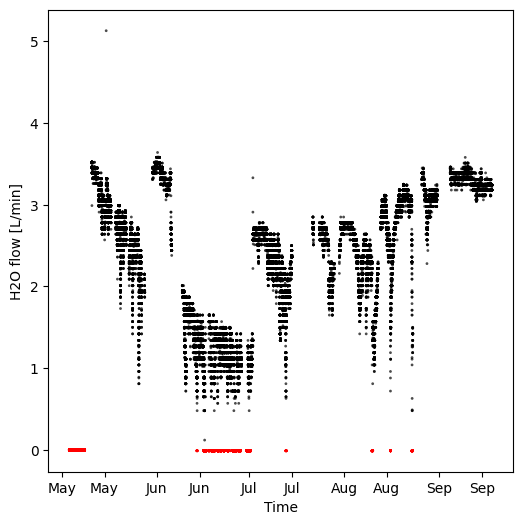

In [5]:
# Set the minimum water flow. Values below this will be highlighted.
min_water_flow = 0.1


# Extract the water flow and detect low flow value
water_flow = df[water_flow_column].values
condition = water_flow < min_water_flow

# Start figure
plt.figure(figsize=(6, 6))

# Scatter plot for points with low water flow (red)
plt.scatter(x[condition], water_flow[condition], marker='o', s=1, edgecolor='red',facecolors='none', label='Low', alpha=0.7)

# Scatter plot for points with normal water flow (black)
plt.scatter(x[~condition], water_flow[~condition], marker='o',s=1, edgecolor='black',facecolors='none', label='Normal', alpha=0.7)

# Format the x-axis tick labels to show only months
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))


# Add labels to the x and y axes
plt.xlabel('Time')
plt.ylabel('H2O flow [L/min]')

# Add a title if needed
plt.title('')

# Specify the file path and name
output_path = f'{output_folder}/8.Eq_Pump_measured_plot_own_range.png'

# Save the plot as a PNG file with high quality
plt.savefig(output_path, dpi=400, bbox_inches='tight')

# Show the plot (optional)
plt.show()

# Equilibrator Pressure

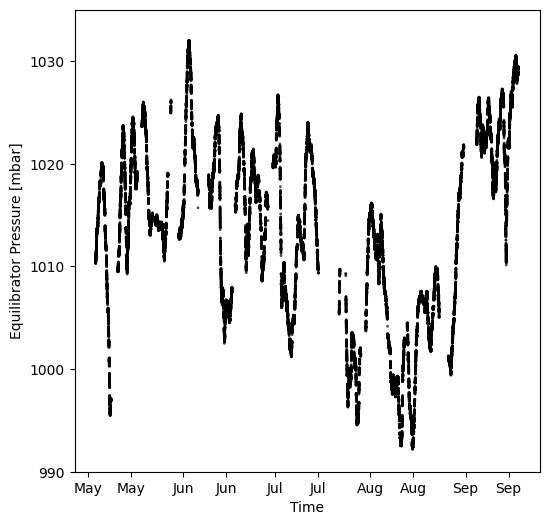

In [6]:
y_min = 990
y_max = 1035


y = df['Pressure in Equilibrator'].values

# Create a scatter plot
plt.figure(figsize=(6, 6))  # Optional: set the figure size

plt.scatter(x, y, s=1, marker='o', edgecolor='k',facecolors='none', alpha=0.7)  # 'o' marker, blue color, transparency

# Format the x-axis tick labels to show only months
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# Set y-axis tick positions and labels from 0 to 120
plt.yticks(np.arange(y_min, y_max, step=10))  # Adjust the step value as needed
plt.ylim(y_min, y_max)

# Add labels to the x and y axes
plt.xlabel('Time')
plt.ylabel('Equilibrator Pressure [mbar]')

# Add a title if needed
plt.title('')

# Specify the file path and name
output_path = f'{output_folder}/4.Equil_Pressplot_own-range.png'

# Save the plot as a PNG file with high quality
plt.savefig(output_path, dpi=400, bbox_inches='tight')

# Show the plot (optional)
plt.show()

## Water fCO2

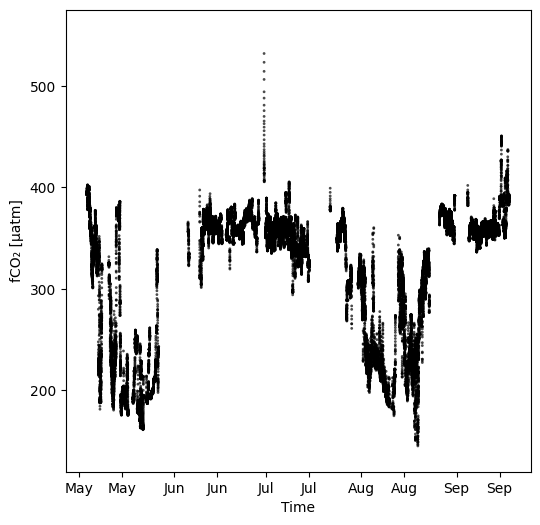

In [7]:
co2_min = 120
co2_max = 575

y_min = co2_min
y_max = co2_max


y = df['fCO2 [uatm]'].values

# Create a scatter plot
plt.figure(figsize=(6, 6))  # Optional: set the figure size

# Only show Good values
condition = df['fCO2 [uatm] QC Flag']== 2

# Scatter plot for points with y >= 20 (black)
plt.scatter(x[condition], y[condition],s=1, marker='o', edgecolor='black',facecolors='none', label='y >= 20', alpha=0.7)

# Format the x-axis tick labels to show only months
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))



# Add labels to the x and y axes
plt.xlabel('Time')
plt.ylabel('fCO₂ [μatm]')
plt.ylim(y_min, y_max)

# Add a title if needed
plt.title('')

# Specify the file path and name
output_path = f'{output_folder}/9.fCO2_own-range.png'


# Save the plot as a PNG file with high quality
plt.savefig(output_path, dpi=400, bbox_inches='tight')

# Show the plot (optional)
plt.show()

## xCO2 vs fCO2

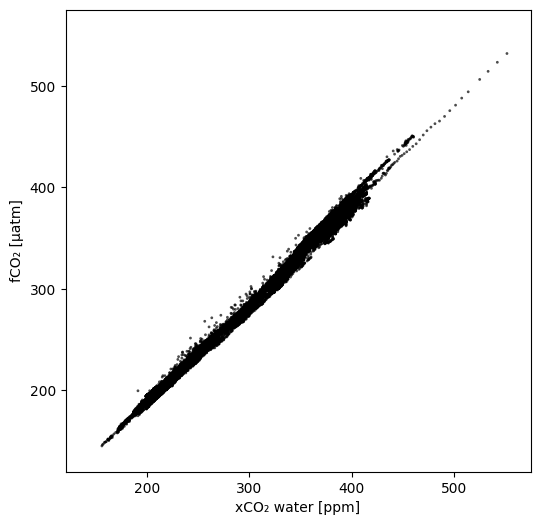

In [9]:
x_min = co2_min
x_max = co2_max
y_min = co2_min
y_max = co2_max

x = df['CO2 um/m'].values
y = df['fCO2 [uatm]'].values

# Create a scatter plot
plt.figure(figsize=(6, 6))  # Optional: set the figure size
# Define a condition for coloring points
condition = df['fCO2 [uatm] QC Flag']== 2

# Scatter plot for points with y >= 20 (black)
plt.scatter(x[condition], y[condition],s=1, marker='o', edgecolor='black',facecolors='none', label='y >= 20', alpha=0.7)

# Add labels to the x and y axes
plt.xlabel('xCO₂ water [ppm]')
plt.ylabel('fCO₂ [μatm]')

plt.xlim(x_min, y_max)
plt.ylim(y_min, y_max)

# Specify the file path and name
output_path = f'{output_folder}/10.fCO2_vs_xCO2_own-range.png'

# Save the plot as a PNG file with high quality
plt.savefig(output_path, dpi=400, bbox_inches='tight')

# Show the plot (optional)
plt.show()

## xCO2

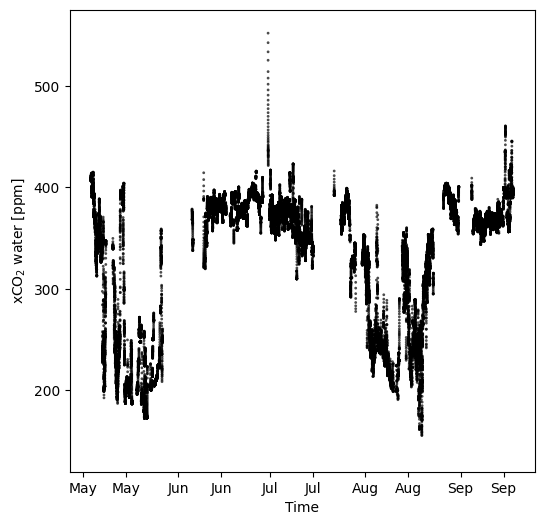

In [10]:
y_min = co2_min
y_max = co2_max

x = dt
y = df['CO2 um/m'].values

# Create a scatter plot
plt.figure(figsize=(6, 6))  # Optional: set the figure size

# Only show good values
condition = df['fCO2 [uatm] QC Flag']== 2

# Scatter plot for points with y >= 20 (black)
plt.scatter(x[condition], y[condition],s=1, marker='o', edgecolor='black',facecolors='none', label='y >= 20', alpha=0.7)

# Format the x-axis tick labels to show only months
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# Add labels to the x and y axes
plt.xlabel('Time')
plt.ylabel('xCO$_2$ water [ppm]')

plt.ylim(y_min, y_max)

# Specify the file path and name
output_path = f'{output_folder}/5.CO2_measured_plot_own-range.png'

# Save the plot as a PNG file with high quality
plt.savefig(output_path, dpi=400, bbox_inches='tight')

# Show the plot (optional)
plt.show()

## Equilibrator Temperature

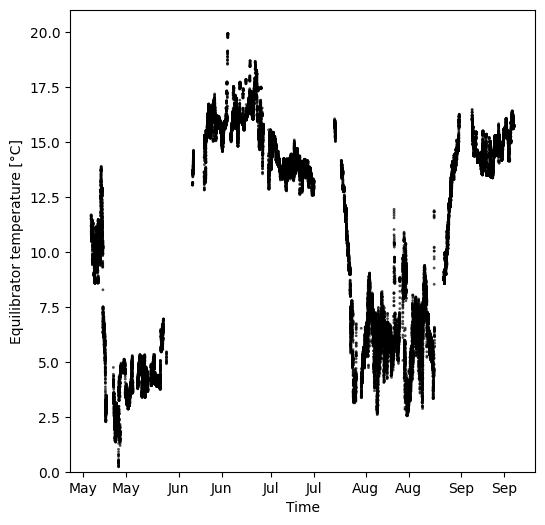

In [11]:
y_min = 0
y_max = 21

x = dt
y = df['equ temp'].values

# Create a scatter plot
plt.figure(figsize=(6, 6))  # Optional: set the figure size

# Only show good values
condition = df['equ temp QC Flag']== 2

# Scatter plot for points with y >= 20 (black)
plt.scatter(x[condition], y[condition],s=1, marker='o', edgecolor='black',facecolors='none', label='y >= 20', alpha=0.7)

# Format the x-axis tick labels to show only months
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# Add labels to the x and y axes
plt.xlabel('Time')
plt.ylabel('Equilibrator temperature [°C]')
plt.ylim(y_min, y_max)

# Specify the file path and name
output_path = f'{output_folder}/2.Equil_temp_plot_own-range.png'

# Save the plot as a PNG file with high quality
plt.savefig(output_path, dpi=400, bbox_inches='tight')

# Show the plot (optional)
plt.show()

## Data Stats

### Main stats (for table 4.2)

In [12]:
stat_columns = [
    ['Intake Temperature', 'Temp [degC]'],
    ['Equilibrator Temperature', 'Temperature of Equilibration [degC]'],
    ['Salinity', 'P_sal [psu]'],
    ['Equilibrator Pressure', 'Pressure in Equilibrator'],
    ['Sea Surface xCO₂', 'xCO₂ water calibrated'],
    ['Sea Surface fCO₂', 'fCO2 [uatm]']
]

for (name, col) in stat_columns:

    total_measurements = df.count()[col]
    good_measurements = len(df[df[f'{col} QC Flag'] == 2])
    qc_comments = df[f'{col} QC Comment'].value_counts().sort_values(ascending=False)
    
    print(name)
    print(f'Total measurements: {total_measurements}')
    print(f'Good measurements: {good_measurements} ({good_measurements / total_measurements * 100:.1f}%)')
    print()
    for comment in qc_comments.index.tolist():
        print(f'{comment}: {qc_comments[comment]} ({qc_comments[comment] / total_measurements * 100:.1f}%)')
    print()
    print()
    

Intake Temperature
Total measurements: 57982
Good measurements: 56674 (97.7%)

ΔT out of range: 1308 (2.3%)


Equilibrator Temperature
Total measurements: 59214
Good measurements: 51252 (86.6%)

ΔT out of range: 5140 (8.7%)
Constant for too long: 2800 (4.7%)
Speed too high: 17 (0.0%)
ΔT out of range;Constant for too long: 4 (0.0%)
Changes too quickly: 1 (0.0%)


Salinity
Total measurements: 64937
Good measurements: 64937 (100.0%)



Equilibrator Pressure
Total measurements: 59214
Good measurements: 58987 (99.6%)

Standard deviation is too large: 211 (0.4%)
Speed too high: 16 (0.0%)


Sea Surface xCO₂
Total measurements: 59214
Good measurements: 57685 (97.4%)

Missing prior and/or post gas standards: 1503 (2.5%)
Speed too high: 26 (0.0%)


Sea Surface fCO₂
Total measurements: 51906
Good measurements: 48555 (93.5%)

Missing prior and/or post gas standards;xCO₂ (with standards) Missing prior and/or post gas standards: 1286 (2.5%)
Equilibrator Temperature ΔT out of range;ΔT out of range: 5

### Misc stats (for text section 4.3.1 and 4.3.2)

#### Total Rows

In [13]:
print(f'Total rows: {len(df)}')

Total rows: 82689


#### Atmospheric xCO₂

In [14]:
atmco2_col = 'xCO2 In Atmosphere - Calibrated In Dry Air [mol mol-1]'
atm_count = df.count()[atmco2_col]
print(f'Atmospheric xCO₂ count: {atm_count}')

atm_low = len(df[df[atmco2_col] < 300])
atm_high = len(df[df[atmco2_col] > 500])
print(f'Atm CO2 out of range: {atm_low + atm_high} ({(atm_low + atm_high) / atm_count * 100:.1f}%)')

Atmospheric xCO₂ count: 5952
Atm CO2 out of range: 3 (0.1%)


#### Oxygen

In [15]:
o2_col = 'Oxygen'
o2_count = df.count()[o2_col]
print(f'Oxygen rows: {o2_count}')

o2_low = len(df[df[o2_col] < 50])
o2_high = len(df[df[o2_col] > 400])
print(f'O2 out of range: {o2_low + o2_high} ({(o2_low + o2_high) / o2_count * 100:.1f}%)')


KeyError: 'Oxygen'

#### ∆T

In [16]:
delta_t_col = 'Water-Equilibrator Temperature Difference [°C]'
abs_delta_t = abs(df[delta_t_col])

delta_t_count = abs_delta_t.count()

print(f'Total ∆T values: {delta_t_count}')

delta_t_out_of_range = len(abs_delta_t[abs_delta_t > 1.5])

print(f'∆T out of range = {delta_t_out_of_range} ({delta_t_out_of_range / delta_t_count * 100:.1f}%)')


Total ∆T values: 52035
∆T out of range = 1302 (2.5%)
